# <font color = red> *** FILL YOUR INFORMATION HERE *** </font>
Name: Juhamatti Vasamaa <br>
Date: 9.11.2021  <br>

______________
# Data Analysis and Knowledge Discovery 2021 <br> Exercise 2, Data Understanding and Visualization

- This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

- The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

- Two datasets are used: shipdata1_2021.csv and shipdata2_2021.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

### Gather **all** packages needed for this notebook here:
- This does not mean that you can not use any packages not imported below, but the exercise can be done without importing any extras

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Show the plots inline in the notebook
%matplotlib inline

________

#  <font color = dimgrey> Know your data: an introduction to the data and domain knowledge </font>

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/

The exercise data has the following columns/attributes:
- **MMSI**

    * Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship. The first three numbers tell the nationality of the ship - for example finnish ships would have the number 266 preceding them. The following six digits are the identifying part unique to each ship. <br> 
    
- **Speed**
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- **COG**
    * Course Over Ground<br> COG=3600 means “not available”
- **Destination**
    * The Destination of the subject vessel according to the AIS transmissions
- **Ship_type**
    * The Shiptype of the subject vessel according to AIS transmissions -
- **Gross_tonnage**
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- **Length**
    * The overall Length (in metres) of the subject vessel
- **Breadth**
    * The Breadth (in metres) of the subject vessel

________
## <font color = dimgrey> 1. Data import </font> 

Datasets for this exercise are available via the following url-paths
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv
_____________________

**a)** First load data files shipdata1.csv and shipdata2.csv using pandas.
-  *Note! Files were prepared by two different persons, so there are differences in the file formatting!*

In [ ]:
# Here are the paths to the files
##################################
# Load shipdata1.csv
url1 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv' 
# Load shipdata2.csv
url2 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv'
#Print/show in notebook first 5 rows of both dataframes. 

In [ ]:
#Loading data from the source
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df1, df2

(         MMSI    Speed      COG  ... Gross_tonnage Length  Breadth
 0   212209000  10.1000  64.3000  ...          3416   94.9    15.30
 1   212436000  13.5256  77.0755  ...          6280  116.9    18.00
 2   219082000   9.9000  74.7000  ...          9980  141.2    21.90
 3   219083000  11.6038  74.8000  ...          9980  141.2    21.60
 4   219426000  11.9203  56.3253  ...          3219   99.9    15.00
 ..        ...      ...      ...  ...           ...    ...      ...
 64  259768000  11.8492  80.3430  ...         11935  144.1    23.20
 65  538002774  11.5935  67.3823  ...         30641  195.0    32.20
 66  538002778  11.3631  74.6552  ...         30641  195.0    32.24
 67  636016683  10.9000  75.4000  ...          5440  108.0    16.80
 68  636016752  11.7000  74.6000  ...          3853   92.9    15.30
 
 [69 rows x 8 columns],
          MMSI    Speed      COG  ... Gross_tonnage  Length  Breadth
 0   538002778  11,3631  74,6552  ...         30641     195    32,24
 1   636016752     1

**b)** Print/show in notebook first 5 rows of both dataframes. 

In [ ]:
#Shows top 5 rows from both datasets 
df1.head(5), df2.head(5)

(        MMSI    Speed      COG  ... Gross_tonnage Length  Breadth
 0  212209000  10.1000  64.3000  ...          3416   94.9     15.3
 1  212436000  13.5256  77.0755  ...          6280  116.9     18.0
 2  219082000   9.9000  74.7000  ...          9980  141.2     21.9
 3  219083000  11.6038  74.8000  ...          9980  141.2     21.6
 4  219426000  11.9203  56.3253  ...          3219   99.9     15.0
 
 [5 rows x 8 columns],
         MMSI    Speed      COG  ... Gross_tonnage  Length  Breadth
 0  538002778  11,3631  74,6552  ...         30641     195    32,24
 1  636016752     11,7     74,6  ...          3853    92,9     15,3
 2  244870429  11,7126  69,5662  ...          7251     115     18,6
 3  305653000  10,8253  56,4266  ...          6668  107,03    18,42
 4  235060255  11,7311     80,9  ...         23353   184,0     27,7
 
 [5 rows x 8 columns])

**c)** For the vessel with **MMSI 231844000**, search for gross tonnage, length and breadth from one of the datasets 

In [ ]:
for MMSI in df1['MMSI'],df2['MMSI']: #looping through df1 & df2 to find right vessel 
  if MMSI is 231844000 or '231844000': #if vessel number found proceed 
    three_attributes = (df1['Gross_tonnage'],df1['Length'],df1['Breadth']) #select asked columns for that vessel
    df = pd.DataFrame(data=three_attributes) #create dataframe to show asked columns as rows
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
Gross_tonnage,3416.0,6280.0,9980.0,9980.0,3219.0,4364.0,3978.0,2280.0,8620.0,4896.0,6045.0,9056.0,1905.0,8521.0,1985.0,4235.0,3300.0,6045.00,6668.00,100.0,1999.0,2301.0,6540.0,2862.0,2622.0,2548.0,4035.00,11596.0,2984.0,8829.0,5257.0,2528.0,6556.0,81502.00,3603.0,11935.0,7833.0,286.0,12192.0,1987.0,1513.0,5796.0,61990.0,15633.00,1587.0,298.0,3259.0,3405.0,107.0,2876.0,24133.0,27427.0,2516.0,2979.00,7636.0,15980.0,852.0,11935.0,7833.0,1825.0,7071.0,3785.0,3790.0,3235.0,11935.0,30641.0,30641.00,5440.0,3853.0
Length,94.9,116.9,141.2,141.2,99.9,122.0,100.0,82.6,137.1,118.6,123.6,140.2,87.9,136.0,82.5,108.5,99.9,123.60,106.97,15.0,82.4,82.5,134.5,94.7,88.3,89.0,111.40,125.5,90.0,134.7,117.0,90.0,116.9,274.00,101.2,144.1,150.2,33.3,141.4,81.2,82.3,122.0,247.0,161.09,82.2,31.0,101.8,103.0,23.8,88.9,191.4,182.5,113.9,89.95,129.8,169.5,64.2,144.1,117.8,79.4,120.8,100.0,99.9,94.9,144.1,195.0,195.00,108.0,92.9
Breadth,15.3,18.0,21.9,21.6,15.0,16.0,16.5,12.3,19.1,16.4,19.5,22.2,11.4,32.0,12.5,15.9,15.0,19.23,18.42,5.0,12.5,12.4,16.5,13.4,12.9,12.5,13.35,18.8,15.4,20.8,16.9,12.5,18.0,48.04,14.4,23.0,17.3,9.2,22.5,12.4,11.3,18.7,44.0,25.43,11.3,10.5,18.8,13.6,7.0,13.2,26.2,32.2,13.2,15.25,19.9,23.8,10.5,23.2,18.6,13.8,16.4,17.0,16.5,14.5,23.2,32.2,32.24,16.8,15.3


_________
## <font color = dimgrey> 2. Fix numeric data

**a)** The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

<font color = red> The difference is how they are delimetered. df1 is using dot as a delimeter and df2 uses comma.

**b)** Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [ ]:
df2 = pd.DataFrame(df2, dtype=str)
for column in df2.columns:
  df2[column] = df2[column].str.replace(',','.')
df2

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195,32.24
1,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115,18.6
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42
4,235060255,11.7311,80.9,Primorsk,Tanker,23353,184.0,27.7
...,...,...,...,...,...,...,...,...
62,273374820,10.0,74.6,Vysotsk,nan,4979,1399,16.7
63,273385070,9.4,74.5,Vysotsk,Tanker,4979,139.9,16.9
64,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.9,16.9
65,636092755,11.2,73.7,Vysotsk,Tanker,23240,183.0,27.4


**c)** Print first 5 rows of  the now fixed  shipdata2 dataframe. 

In [ ]:
# prints first five rows of df2 after formatting
df2.head(5)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195,32.24
1,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3
2,244870429,11.7126,69.5662,Porvoo,Tanker,7251,115,18.6
3,305653000,10.8253,56.4266,Porvoo,Cargo,6668,107.03,18.42
4,235060255,11.7311,80.9,Primorsk,Tanker,23353,184.0,27.7


__________
## <font color = dimgrey> 3. Combine dataframes together

*Tip for this section: Each subtask can be easily done with one (or two) line(s) of code when using Pandas.*

**a)** Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [ ]:
df1 = pd.DataFrame(df1, dtype=str) # converts df1 to same type as df2
Origin1,Origin2 = 1,2 # values for shidata1 and 2
df1['Origin'],df2['Origin'] = Origin1,Origin2 # adding column=Origin + value for shipdata1 and 2
df1,df2 # show data

(         MMSI    Speed      COG  ... Length Breadth Origin
 0   212209000     10.1     64.3  ...   94.9    15.3      1
 1   212436000  13.5256  77.0755  ...  116.9    18.0      1
 2   219082000      9.9     74.7  ...  141.2    21.9      1
 3   219083000  11.6038     74.8  ...  141.2    21.6      1
 4   219426000  11.9203  56.3253  ...   99.9    15.0      1
 ..        ...      ...      ...  ...    ...     ...    ...
 64  259768000  11.8492   80.343  ...  144.1    23.2      1
 65  538002774  11.5935  67.3823  ...  195.0    32.2      1
 66  538002778  11.3631  74.6552  ...  195.0   32.24      1
 67  636016683     10.9     75.4  ...  108.0    16.8      1
 68  636016752     11.7     74.6  ...   92.9    15.3      1
 
 [69 rows x 9 columns],
          MMSI    Speed      COG  ...  Length Breadth Origin
 0   538002778  11.3631  74.6552  ...     195   32.24      2
 1   636016752     11.7     74.6  ...    92.9    15.3      2
 2   244870429  11.7126  69.5662  ...     115    18.6      2
 3   30565

**b)** Combine the two separate dataframes as one new dataframe.

In [ ]:
tables = [df1,df2] # puts dataframes to one variable
big_df = pd.concat(tables, ignore_index=True) # concatenates tables as one keeping both table values
big_df

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,212209000,10.1,64.3,Hamina,Cargo,3416,94.9,15.3,1
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0,1
2,219082000,9.9,74.7,Hamina,Tanker,9980,141.2,21.9,1
3,219083000,11.6038,74.8,Hamina,Tanker,9980,141.2,21.6,1
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.0,1
...,...,...,...,...,...,...,...,...,...
131,273374820,10.0,74.6,Vysotsk,nan,4979,1399,16.7,2
132,273385070,9.4,74.5,Vysotsk,Tanker,4979,139.9,16.9,2
133,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.9,16.9,2
134,636092755,11.2,73.7,Vysotsk,Tanker,23240,183.0,27.4,2


**c)** Check a sample of the new dataframe by taking a random sample of six rows and printing it.

In [ ]:
big_df.sample(n=6) # n here tells us that how many sample rows we take

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
21,236029000,10.1,73.4,Kotka,Cargo,2301,82.5,12.4,1
8,246591000,9.2,74.6,Hamina,Cargo,8620,137.1,19.1,1
114,375067000,8.5,75.0,Valko-Loviisa,Cargo,1307,74.9,10.5,2
80,374538000,10.0683,94.5346,Sillamäe,Cargo,6354,108.5,18.6,2
116,209185000,12.3292,73.0241,Valko-Loviisa,Cargo,6872,109.83,18.6,2
98,538003321,12.7359,79.5269,Ust-Luga,Tanker,62775,250.0,44.0,2


**d)** Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [ ]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MMSI           136 non-null    object
 1   Speed          136 non-null    object
 2   COG            136 non-null    object
 3   Destination    136 non-null    object
 4   Ship_type      136 non-null    object
 5   Gross_tonnage  136 non-null    object
 6   Length         136 non-null    object
 7   Breadth        136 non-null    object
 8   Origin         136 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 9.7+ KB


<font color = red> We can see which class does the dataframe belong to: 'pandas.core.frame.DataFrame', that we have 136 rows and 9 columns, column names, column datatype (e.g. Origin datatype is different (int64) than others which are objects and how much memory does it take to run the dataset. </font>

__________
## <font color = lightcoral> 4. Data cleaning

**a)** Check if there are any missing data.

In [ ]:
# At row 131 under column 'Ship_type' in the dataset there is 'nan' or '' value
# but isna() or isnull() don't recognize it for some reason so I made it recognizable here
big_df.loc[big_df.index[131], 'Ship_type'] = np.nan 
one_df = big_df.isna() # checks if df has any NaN values
one_df # One found from column 'Ship_type', row 131 (Shows bool=True below)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
131,False,False,False,False,True,False,False,False,False
132,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False


**b)** Check if there any duplicate data; any vessel in the dataframe several times?

In [ ]:
big_df = pd.DataFrame(big_df)
duplicates = big_df.duplicated() #No duplicates row wise = False
duplicates_MMSI = big_df.duplicated(['MMSI'], keep=False) # Found two duplicate = True column wise, .any() allows us to compare all values at 'MMSI' column 
print(f'{duplicates}\n{duplicates_MMSI}') #Print boolean values
print('# duplicate rows:',duplicates_MMSI.sum()) #all rows which contain duplicate values
big_df.loc[duplicates_MMSI, :] #Show duplicate pair rows, two duplicate vessels 

0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool
# duplicate rows: 4


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
66,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195.0,32.24,1
68,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3,1
69,538002778,11.3631,74.6552,Porvoo,Tanker,30641,195,32.24,2
70,636016752,11.7,74.6,Porvoo,Tanker,3853,92.9,15.3,2


**c)** Resolve missing data and remove duplicate data.

In [ ]:
#Here I replaced NaN value from column 'Ship_type', row 131 to same as next rows (132) value
#because you can assume that 'Ship_type' is the same based on the row 132s column values:
#Gross_tonnage and Length
big_df = big_df.fillna(method='bfill')
big_df = big_df.drop_duplicates(subset=['MMSI']) #drops duplicate rows (in this case two rows)
big_df

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,212209000,10.1,64.3,Hamina,Cargo,3416,94.9,15.3,1
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.9,18.0,1
2,219082000,9.9,74.7,Hamina,Tanker,9980,141.2,21.9,1
3,219083000,11.6038,74.8,Hamina,Tanker,9980,141.2,21.6,1
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.9,15.0,1
...,...,...,...,...,...,...,...,...,...
131,273374820,10.0,74.6,Vysotsk,Tanker,4979,1399,16.7,2
132,273385070,9.4,74.5,Vysotsk,Tanker,4979,139.9,16.9,2
133,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.9,16.9,2
134,636092755,11.2,73.7,Vysotsk,Tanker,23240,183.0,27.4,2


**d)** Print out proof that there are no more missing or duplicate data

In [ ]:
no_missing = big_df.notna() #no missing values
no_dups = big_df.duplicated() #no duplicates in whole dataset
no_dups_MMSI = big_df.duplicated(subset=['MMSI'], keep=False) #no duplicates in favor of column 'MMSI'
print(f'{no_missing}\n{no_dups}\n{no_dups_MMSI}')

     MMSI  Speed   COG  Destination  ...  Gross_tonnage  Length  Breadth  Origin
0    True   True  True         True  ...           True    True     True    True
1    True   True  True         True  ...           True    True     True    True
2    True   True  True         True  ...           True    True     True    True
3    True   True  True         True  ...           True    True     True    True
4    True   True  True         True  ...           True    True     True    True
..    ...    ...   ...          ...  ...            ...     ...      ...     ...
131  True   True  True         True  ...           True    True     True    True
132  True   True  True         True  ...           True    True     True    True
133  True   True  True         True  ...           True    True     True    True
134  True   True  True         True  ...           True    True     True    True
135  True   True  True         True  ...           True    True     True    True

[134 rows x 9 columns]
0   

____________
## <font color = Navy> 5. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [ ]:
d_types = big_df.dtypes #checking datatypes
#Converting datatypes
big_df = big_df.astype({'MMSI':float,'Speed':float,'COG':float,'Destination':str,'Ship_type':str,'Gross_tonnage':float,'Length':float,'Breadth':float,'Origin':float})
print(f'{big_df}\n{d_types}')

            MMSI    Speed      COG  ...   Length Breadth  Origin
0    212209000.0  10.1000  64.3000  ...    94.90   15.30     1.0
1    212436000.0  13.5256  77.0755  ...   116.90   18.00     1.0
2    219082000.0   9.9000  74.7000  ...   141.20   21.90     1.0
3    219083000.0  11.6038  74.8000  ...   141.20   21.60     1.0
4    219426000.0  11.9203  56.3253  ...    99.90   15.00     1.0
..           ...      ...      ...  ...      ...     ...     ...
131  273374820.0  10.0000  74.6000  ...  1399.00   16.70     2.0
132  273385070.0   9.4000  74.5000  ...   139.90   16.90     2.0
133  273388150.0   9.7668  68.7159  ...   140.90   16.90     2.0
134  636092755.0  11.2000  73.7000  ...   183.00   27.40     2.0
135  357100000.0  11.2703  59.3888  ...   229.04   32.31     2.0

[134 rows x 9 columns]
MMSI             float64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage    float64
Length           float64
Breadth          floa

**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 
- *This can be done with one line - if your answer gets long consider changing your approach.*

In [ ]:
print(f'{big_df.count()}\n{big_df.mean()}\n{big_df.std()}\n{big_df.min(numeric_only=True)}\n{big_df.quantile(q=(0.25,0.50,0.75))}\n{big_df.max(numeric_only=True)}')

MMSI             134
Speed            134
COG              134
Destination      134
Ship_type        134
Gross_tonnage    134
Length           134
Breadth          134
Origin           134
dtype: int64
MMSI             3.227146e+08
Speed            1.045301e+01
COG              7.827120e+01
Gross_tonnage    1.353529e+04
Length           1.366698e+02
Breadth          2.018672e+01
Origin           1.485075e+00
dtype: float64
MMSI             1.378934e+08
Speed            1.955434e+00
COG              1.573198e+01
Gross_tonnage    1.843359e+04
Length           1.240405e+02
Breadth          9.943960e+00
Origin           5.016525e-01
dtype: float64
MMSI             2.091850e+08
Speed            5.500000e+00
COG              5.332640e+01
Gross_tonnage    1.000000e+02
Length           1.500000e+01
Breadth          5.000000e+00
Origin           1.000000e+00
dtype: float64
             MMSI      Speed      COG  Gross_tonnage   Length  Breadth  Origin
0.25  232635260.0   8.961525  71.0531       

**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes. Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [ ]:
print(f'{big_df.count()}\n{big_df.mean()}\n{big_df.std()}\n{big_df.min(numeric_only=True)}\n{big_df.quantile(q=(0,0.25,0.50,0.75,1.0))}\n{big_df.max(numeric_only=True)}')

MMSI             134
Speed            134
COG              134
Destination      134
Ship_type        134
Gross_tonnage    134
Length           134
Breadth          134
Origin           134
dtype: int64
MMSI             3.227146e+08
Speed            1.045301e+01
COG              7.827120e+01
Gross_tonnage    1.353529e+04
Length           1.366698e+02
Breadth          2.018672e+01
Origin           1.485075e+00
dtype: float64
MMSI             1.378934e+08
Speed            1.955434e+00
COG              1.573198e+01
Gross_tonnage    1.843359e+04
Length           1.240405e+02
Breadth          9.943960e+00
Origin           5.016525e-01
dtype: float64
MMSI             2.091850e+08
Speed            5.500000e+00
COG              5.332640e+01
Gross_tonnage    1.000000e+02
Length           1.500000e+01
Breadth          5.000000e+00
Origin           1.000000e+00
dtype: float64
             MMSI      Speed       COG  ...    Length  Breadth  Origin
0.00  209185000.0   5.500000   53.3264  ...    15.00

<font color = red> If we should use all the attributes for the comparison here, it doesn't make sense because we can't get anything reasonable out of it. We have to take few columns/attributes out, tweak them and then compare them. On the otherhand, we can see some usefull data from the output: e.g. Vessel min/max speed, Vessel Gross_tonnage mean (we can get an idea how big vessels are on average). 

**c)** Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these **but leave out everything else except mean, std and max**. 

- *Tip: check the type of the output of the function you used in the last step. What is the type and how could you subset it? What did you learn about pandas indexing in the first exercise?*

In [ ]:
print('Mean:',big_df[['Speed','Length','Breadth']].mean(),'Std:',big_df[['Speed','Length','Breadth']].std(),'Max:',big_df[['Speed','Length','Breadth']].max(),sep='\n')

Mean:
Speed       10.453009
Length     136.669776
Breadth     20.186716
dtype: float64
Std:
Speed        1.955434
Length     124.040522
Breadth      9.943960
dtype: float64
Max:
Speed        17.0825
Length     1399.0000
Breadth      48.0400
dtype: float64


 **d)** Descriptive statistics by Ship_type <br>
- Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br> 
"by" here means that you group by that variable.
- *Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.*<br>

In [ ]:
grouped = big_df.groupby('Ship_type') #Groups table by Ship_type
groups = grouped['Speed','Length','Breadth'].agg([np.mean,np.std,np.max]) #Calculates mean,std and max for speed,length and breadth
groups

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Speed                     ...    Breadth                  
                mean       std     amax  ...       mean        std   amax
Ship_type                                ...                             
Cargo       9.946178  1.902921  17.0825  ...  16.841493   5.984697  32.31
Tanker     11.339816  1.700933  14.6805  ...  25.862759  11.016503  48.04
Tug         8.511111  0.993031   9.9000  ...   8.511111   1.749603  10.50

[3 rows x 9 columns]

**e)** How many ship types there are? Which Ship type has the largest breadth?

<font color = red> Three (3) ship types: Cargo, Tanker and Tug. Tanker has largest breadth. </font>

_______________
## <font color = forestgreen> 6. Visualizations </font>

### A few more words on matplotlib and seaborn

As you saw in the first exercise, matplotlib plotting is structured with the 'axes' and 'figure' objects. The meaning and the names of these can be somewhat confusing so here is a small example and explanation of them to avoid confusion in the future. This small explanation tries to help you avoid common mistakes and frustration. 
    
- The **<font color = dimgrey> figure </font>** object contains all plotting elements, in other words everything we see. You can think of it as a canvas where things are drawn. 
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can even overlap and their position is defined relative to the figure. 
    
####  Seaborn and matplotlib
- Seaborn goes together with matplotlib, and can be thought to be an extension of it, but there are some things that can confuse you along the way if their relationship is presented like this. One tip in particular that one might have problems with is that in seaborn there are figure-level, axes-level plots. Figure level plots dont work with a matplotlib subplot and are used so that only one plot is made per figure. Axes level plots can be put into subplots like matplotlib plots as you saw in the first exercise. 
    
    
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise" </font>. You can for example try to make a similar plot-inside-plot with the exercise data.
    

In [ ]:
#Lets make some example data.
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

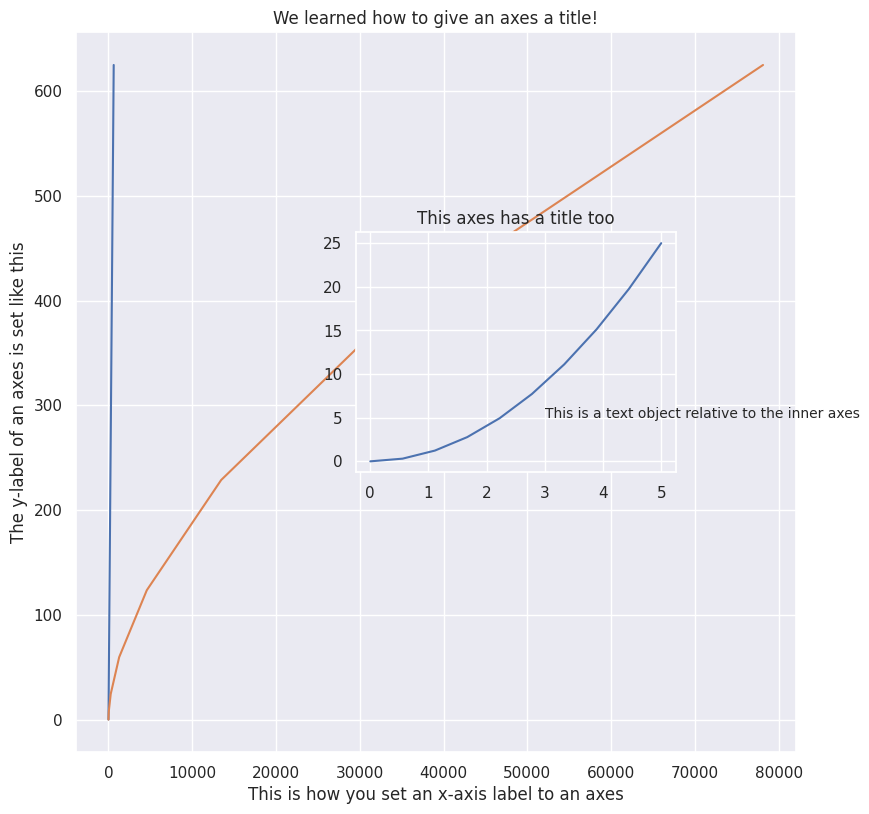

In [ ]:
### Make the figure and axes objects ###
example_figure = plt.figure(figsize =(8,8), dpi = 100) #you give the size of the figure as a tuple of inches
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #The list argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.plot(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

_________
## <font color = Green> 7. Visualizing attribute value distributions </font>
**a)** Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Do you think this a feasible attribute for classification, why? 

- Tip: it would be nice to use subplots when you have more than one plot. 

Text(0.5, 1.0, 'Freedman Diaconis Rule')

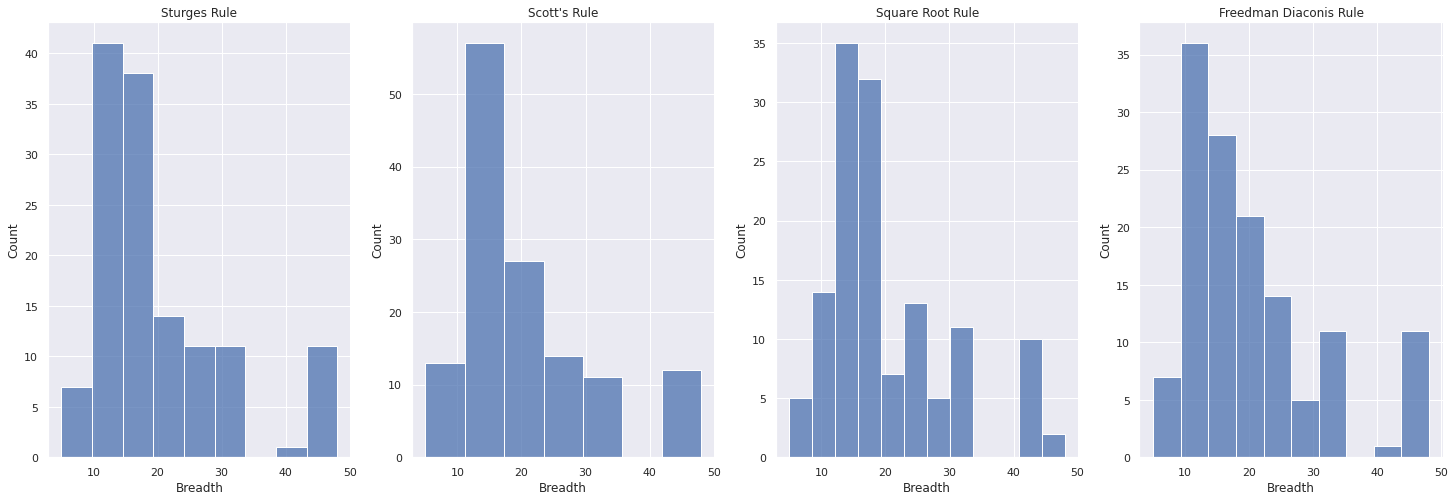

In [ ]:
sns.set()
Breadth = big_df['Breadth']
#Plots using diffenrent bin calculation method
plt.figure(figsize=[25,8]) #figure size
plt.subplot(1,4,1)
sns.histplot(data=Breadth,bins='sturges') #Turned this subplot for demo purposes when comparing distributions for diffrent ship types.
plt.title('Sturges Rule')
plt.subplot(1,4,2)
scott = sns.histplot(data=Breadth,bins='scott')
plt.title("Scott's Rule")
plt.subplot(1,4,3)
sqrt = sns.histplot(data=Breadth,bins='sqrt')
plt.title('Square Root Rule')
plt.subplot(1,4,4)
fd = sns.histplot(data=Breadth,bins='fd')
plt.title('Freedman Diaconis Rule')

<font color = red> Sturges calculates number of bins: k(bins) = 1+3.322*log('datasets sample size') and then determines "optimal" bin width/numer of bins by dividing maxsamplesize-minsamplesize with k. Square root just takes square root from the datasets sample size. Scott divides standard deviation with square root of sample size and Freedman divides less outlier sensitive formula with square root from the datasets sample size. 

No, this isn't feasible attribute alone for classification because we only have ship types to use and they can only tell us the number of ship types in the data set (below plot). Classification needs two or more attributes. If we would take attributes such as "Gross_tonnage","Length" and "Breadth", with these we could make clusters from different ship types. </font>

Text(0.5, 1.0, 'Count of Ship Types')

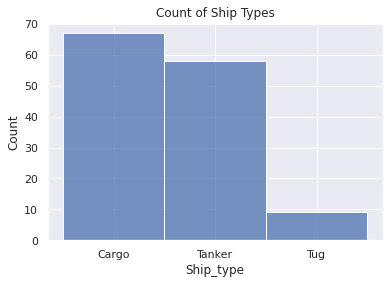

In [ ]:
sns.histplot(x=big_df['Ship_type'],data=Breadth,bins='sturges') #Compares distros of a different ship types
plt.title('Count of Ship Types')

**b)** Compare the distributions of the Breath variable between different ship types. Do you think this a feasible attribute for classification, why?
- *Tip What kind of plot can you do on a continuous variable? You only need to produce one plot, not multiple.*

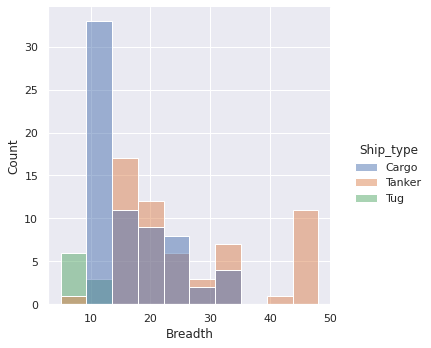

In [ ]:
sns.displot(big_df,x='Breadth',bins='auto',hue='Ship_type') #comparison of distros plotted for breadth and ship types.

<font color = red>Yes it's feasible attribute because as we can see from the above plot that most cargo ships in the data set have breadth between 9 to 12 meters. So basically we can make some observations from it. We can cluster ship types using data from the "Breadth" attribute. After that we could predict which is the ship type based on "Breadth" attribute but the prediction might not be too good -> we might want to take couple of attributes more with us e.g. "Length" and "Gross_tonnage" to get more accurate prediction.</font>

**c)**	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Do you see outliers that require some action?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Breadth')

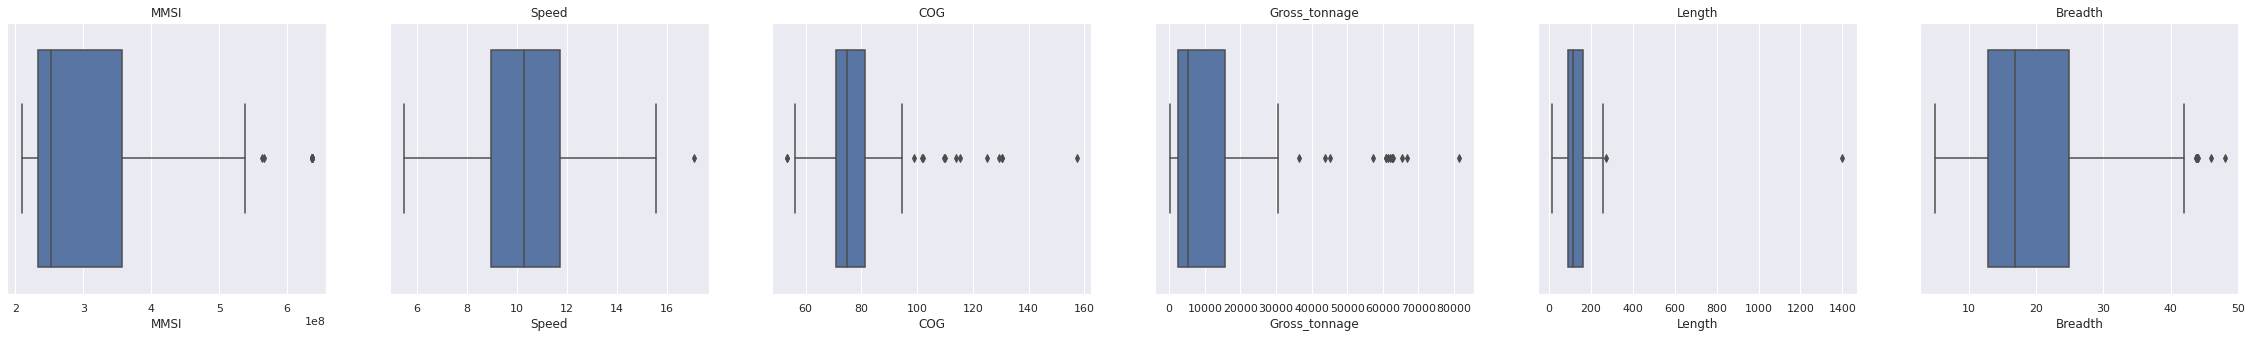

In [ ]:
plt.figure(figsize=[40,5])
plt.subplot(1,6,1)
sns.boxplot(big_df.MMSI,data=big_df,hue=['Ship_type'])
plt.title('MMSI')
plt.subplot(1,6,2)
sns.boxplot(big_df.Speed,data=big_df,hue=['Ship_type'])
plt.title('Speed')
plt.subplot(1,6,3)
sns.boxplot(big_df.COG,data=big_df,hue=['Ship_type'])
plt.title('COG')
plt.subplot(1,6,4)
sns.boxplot(big_df.Gross_tonnage,data=big_df,hue=['Ship_type'])
plt.title('Gross_tonnage')
plt.subplot(1,6,5)
sns.boxplot(big_df.Length,data=big_df,hue=['Ship_type'])
plt.title('Length')
plt.subplot(1,6,6)
sns.boxplot(big_df.Breadth,data=big_df,hue=['Ship_type'])
plt.title('Breadth')

<font color = red>Boxplot is basically plot that shows how your data is distributed and how many outliers you have outside of that "box". As we can see from the above plots there is outlier/s in every plot, e.g. Length wise there is one major outlier which falls very far from the median and we could clearly drop that. Boxplot shows outliers as dots which are outside of the actual box and "whiskers" -> too far from the "min" or "max" sample value.</font>

##  <font color = purple> 8. Relationships between attributes

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 
- *this can be done in one line*

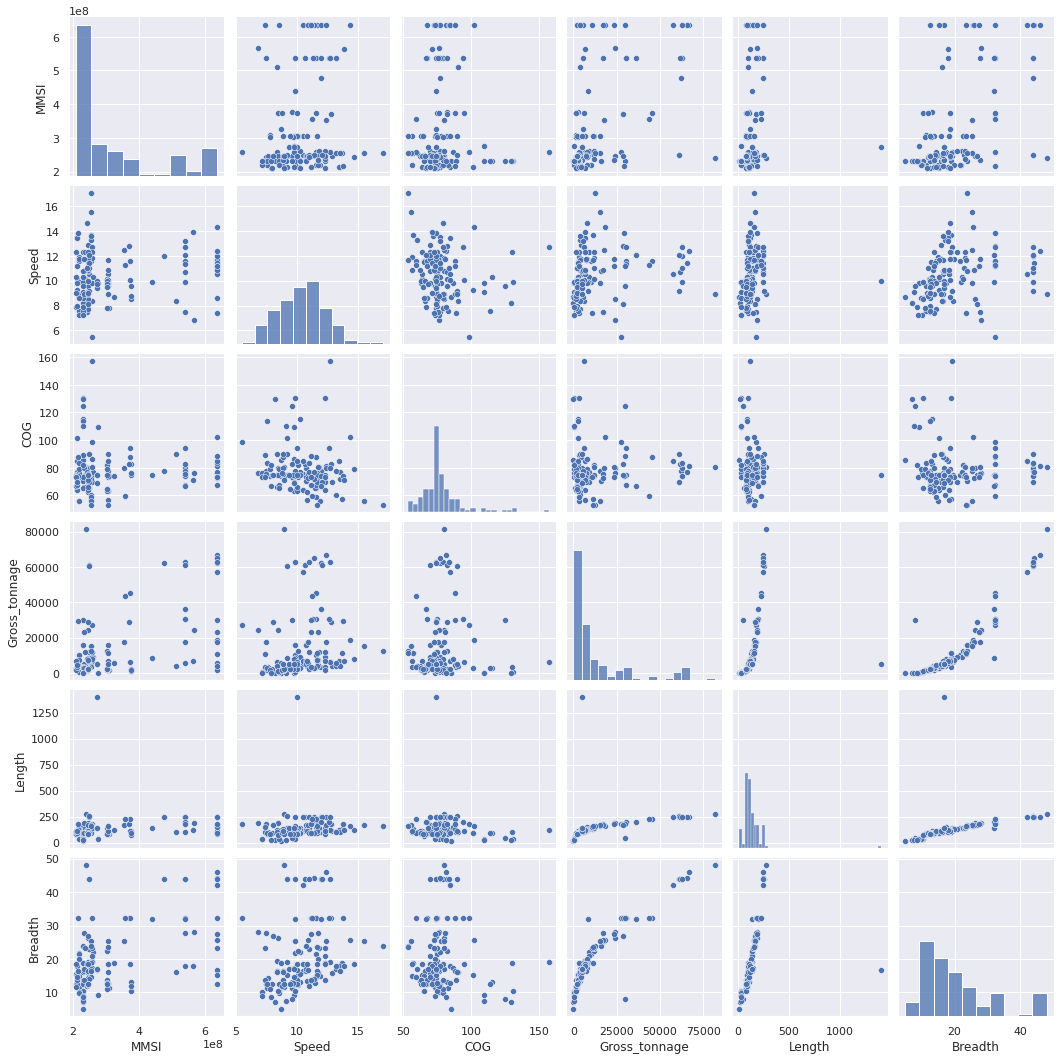

In [ ]:
sns.pairplot(data=pd.DataFrame(data=big_df,columns=['MMSI','Speed','COG','Gross_tonnage','Length','Breadth']))

<font color = red>Yes, we can see for example the same outlier as we saw in part 7 c). Length has one clear outlier, there are others too for example COG and Breadth has outliers outside of the main "cluster" which has biggest number of dots next to each other. \</font>

**b)** Make a new clean dataframe without outlier(s) and replot. What difference do you see? 
- *include the most relevant attributes only, or limit to those needed in next task*

In [ ]:
numeric_df = pd.DataFrame(data=big_df,columns=['MMSI','Speed','COG','Gross_tonnage','Length','Breadth'])
numeric_df.describe()
#function to detect outliers from the dataframe
def outliers(big_df,numeric_df):
  #framework for the box
  Q1 = big_df[numeric_df].quantile(0.25)
  Q3 = big_df[numeric_df].quantile(0.75)
  IQR = (Q3 - Q1) 

  lower_bound = (Q1 - 1.5 * IQR)#low range line
  upper_bound = (Q3 + 1.5 * IQR)#upper range line

  ls = big_df.index[ (big_df[numeric_df] < lower_bound) | (big_df[numeric_df] > upper_bound) ]
  return ls

In [ ]:
#looping through columns and gathering the outliers to the list
index_ls = []
for col in ['MMSI','Speed','COG','Gross_tonnage','Length','Breadth']:
  index_ls.extend(outliers(numeric_df,col))

In [ ]:
# Function to remove outliers
def remove_outliers(df,ls):
  ls = sorted(set(ls))
  new_df = numeric_df.drop(ls)
  return new_df

In [ ]:
cleaned_df = remove_outliers(numeric_df,index_ls) #removing outliers
cleaned_df.shape #Df shape check after removing outliers

(95, 6)

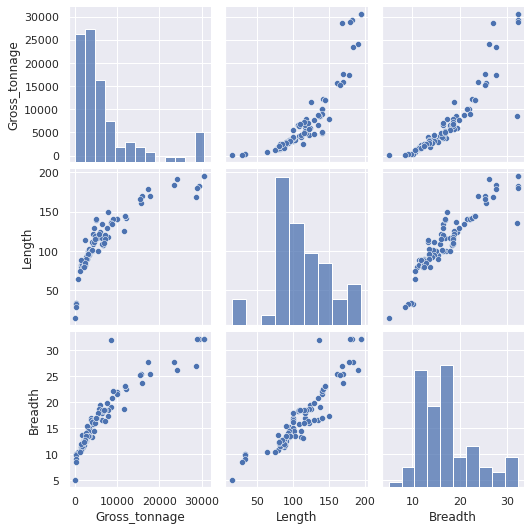

In [ ]:
sns.pairplot(data=pd.DataFrame(cleaned_df,columns=['Gross_tonnage','Length','Breadth']))

<font color = red>We can see that the most distant outliers are gone and scatters look much thicker now so we have now the relevant data without outliers. Again, "Length" shows this best for example if we look at plots above we can clearly see that outliers are removed pretty good. For example x=Length and y=Breadth plot shows this really well.</font>

__________
## <font color = purple> 9. Correlation and heatmap </font>

**a)** Explain what are
- Pearson's correlation
- Spearman's rho and 
- Kendall's tau?

<font color = red>Pearson's correlation coefficient is a measure of linear correlation between two data sets; basically it measures negative and positive correlation between -1 and 1. 
Spearman's rho is basically same type of measure than Pearson's CC but it can handle outliers better because it rather monotonical than linear like Pearson's CC is. 
Kendalls's Tau measures concordant(C) and discordant(D) pair values to get value between -1 and 1, usually it is between 0 and 1 basic formula is (C-D/C+D) with that we can get the correlation between two attributes.</font>

**b)** Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? You can use a heatmap to visualize the matrices and more easily see the strength of the relationship. **See what kind of a difference there is between the cleaned dataset and the non-cleaned dataset.**

Text(0.5, 1.0, 'Unclean Data')

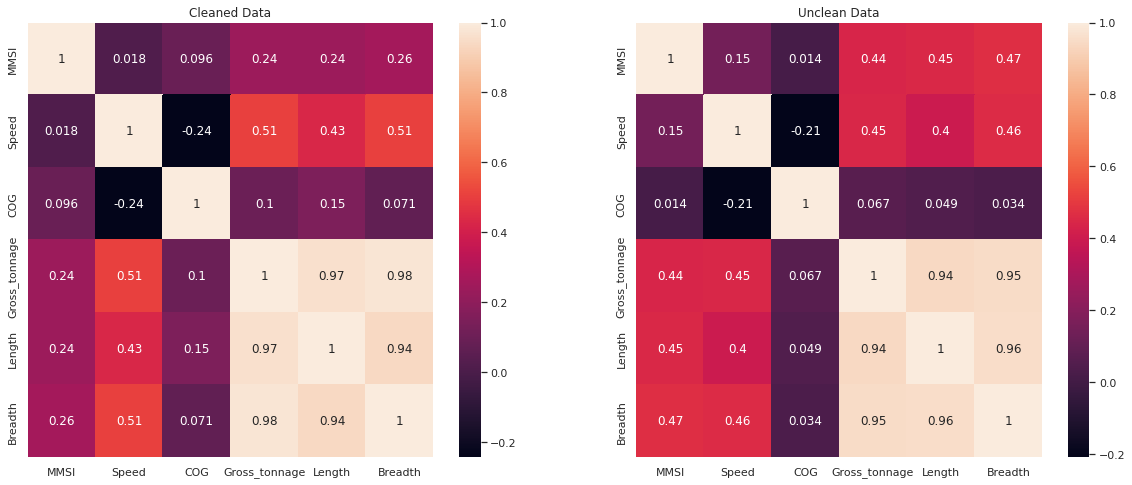

In [ ]:
# Showing correlation in clean and unclean data sets and plotting the heatmaps
# with correlation percentage
cleaned_data = cleaned_df.corr(method='spearman')
unclean_data = numeric_df.corr(method='spearman')
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title('Cleaned Data')
sns.heatmap(cleaned_data,annot=True)
plt.subplot(1,2,2)
sns.heatmap(unclean_data,annot=True)
plt.title('Unclean Data')

<font color = red>As we can see from the above "Clean Data" heatmap that there is big correlation between few attributes which are: "Gross_tonnage","Length" and "Breadth" it can be seen in the 3x3 sized almost white area where values are between 0.94-0.97.

Next, if we compare uncleaned and cleaned data, we can see that the difference is that if the data isn't cleaned then one can find little bit unaccurate results compared to the cleaned data but not much, at least in the "white 3x3 area", for example in this case the matrix shows smaller correlation for non-cleaned "Length" attribute because if we remember from previous scatter plots there was one datapoint/outlier which was really far from the others and now because it's not cleaned from the data set it affects correlation little bit (values=0.94 and 0.96). From the cleaned data heatmap one can see that "Length" has 0.97 correlation with "Gross_tonnage" and 0.94 correlation with "Breadth".</font>

<font color = red>One mentionable observation here too is that when data is cleaned from outliers, correlation to "MMSI" is decreased noticeably, but then correlation to "Speed" increaces.</font>

<font color = red>Ps. I tried all three correlation methods and Spearman's method gave the most accurate relationships.</font>

____________
## <font color = dollargreen >   10. BONUS Dimensionality reduction</font>  
- <font color = red> Answers that only state what you can see are not enough. </font> You need to explain _why_ rather than what and demonstrate you understand what you are doing. By copypasting code from stackoverflow you will not learn much.
____________

- **a)** Explain what principal component analysis is.

<font color = red>PCA is analysis method which simplifies multi-dimensional data-analysis to 2D. For example, if we have two or three attributes we can imagine them in plot using axes x, y and z (3D) but when we go beyond that it becomes hard to imagine what the analysis would look like. PCA aranges highly correlated attribute/columns as clusters in 2D graph.</font>

- **b)** Do it with and without z-score standardization. 

In [ ]:
attrs = ['Length','Gross_tonnage','Breadth'] #attributes to use for formation of principal component (pc)
target = pd.DataFrame(data=big_df,columns=['Ship_type']) #target selection because we need to use that with pc

x=big_df.loc[:,attrs].values #slice data set to reconstruct it later
y=big_df.loc[:,['Ship_type']] #slice data set to reconstruct it later

#z-score standardization done here because after this we can fit our data to smaller dimension better.
scaler = StandardScaler()
x=scaler.fit_transform(x)

#Shrinking our data to 2D format so we can interpret it better
pca = PCA(n_components=2)
pc = pca.fit_transform(x)

#Constructing our new 2D PCA dataframe by concatinating target (Ship_type) 
#with our PC1 and PC2 vector.
p_df = pd.DataFrame(data=pc,columns=['PC1','PC2'])
final_df = pd.concat([p_df,target],axis=1)
final_df.dropna()

,PC1,PC2,Ship_type
0,-0.811812,0.009685,Cargo
1,-0.461403,0.045269,Tanker
2,0.003900,0.049765,Tanker
3,-0.015610,0.058003,Tanker
4,-0.820948,0.058041,Tanker
...,...,...,...
129,3.818151,9.487002,Cargo
130,-0.498888,0.267088,Cargo
131,-0.492125,0.272687,Tanker
132,0.964443,-0.032773,Tanker


In [ ]:
x1=big_df.loc[:,attrs].values #slice data set to reconstruct it later
y1=big_df.loc[:,['Ship_type']] #slice data set to reconstruct it later

#Shrinking our data to 2D format so we can interpret it better
pca1 = PCA(n_components=2)
pc1 = pca.fit_transform(x1)

#Constructing our new 2D PCA dataframe by concatinating target (Ship_type) 
#with our PC1 and PC2 vector.
p_df1 = pd.DataFrame(data=pc1,columns=['PC1','PC2'])
final_df1 = pd.concat([p_df1,target],axis=1)
final_df1.dropna()

#As we can see below, the PC1 and PC2 components are not very accruate without z-score standardization.

,PC1,PC2,Ship_type
0,-10119.365740,-16.023456,Cargo
1,-7255.318039,-1.302392,Tanker
2,-3555.266692,13.596583,Tanker
3,-3555.266844,13.594736,Tanker
4,-10316.352509,-10.523623,Tanker
...,...,...,...
129,-8553.052535,1284.074985,Cargo
130,-8556.255705,25.004182,Cargo
131,-8460.253483,25.759632,Tanker
132,9704.797825,21.654140,Tanker


- **c)** Visualize the results with a scatter plot by projecting the data to the first two principal components.

Text(0.5, 1.0, 'Z-score Standardized PCA')

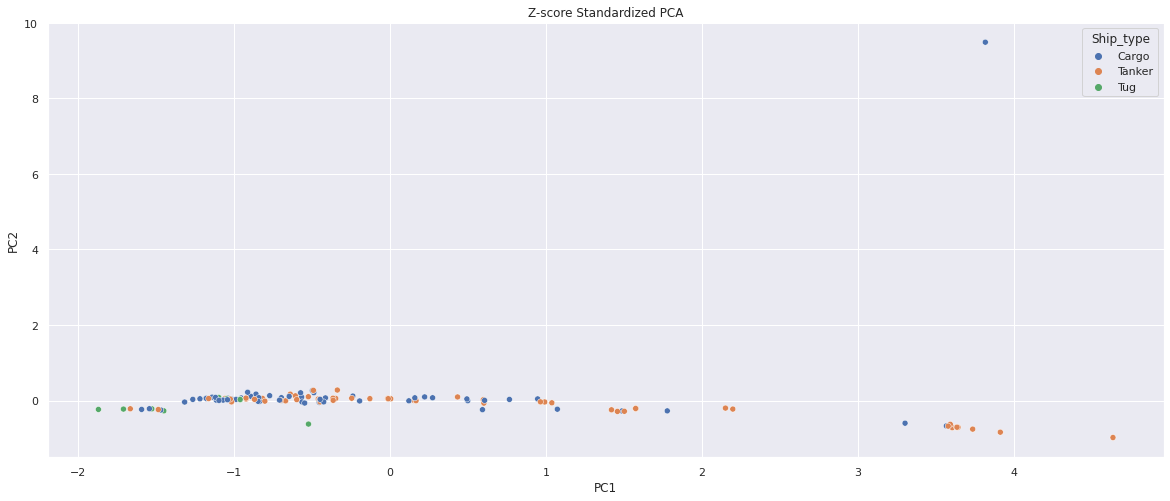

In [ ]:
# Script: Plot principal components

plt.figure(figsize=[20,8])
sns.scatterplot(x=final_df['PC1'],y=final_df['PC2'],data=final_df,hue='Ship_type')
plt.title('Z-score Standardized PCA')

- **d)** How much of the variation is explained with the two principal components? What do you think this means? Where does the variation come from? 

In [ ]:
# Script: Explore variation
pca.explained_variance_, pca.explained_variance_ratio_

(array([3.39799587e+08, 1.31873103e+04]),
 array([9.99961159e-01, 3.88075755e-05]))

<font color = red>I think the variance is explained by the two princibles very well in this case, as we can see from the above plot, the data has maximun spread. But the data is not well correlated with the PC2. The variation comes from the different classes and their attributes, in this case the class is ship type.</font>

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DAKD2021_exercise2.ipynb')

--2021-11-20 17:50:23--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-11-20 17:50:23 (28.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DAKD2021_exercise2.ipynb to pdf
[NbConvertApp] Support files will be in DAKD2021_exercise2_files/
[NbConvertApp] Making directory ./DAKD2021_exercise2_files
[NbConvertApp] Making directory ./DAKD2021_exercise2_files
[NbConvertApp] Making directory ./DAKD2021_exercise2_files
[NbC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'